## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Combine the data into a single dataset - MOuse ID is the common merge point
drug_results = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
drug_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = drug_results.nunique()['Mouse ID']
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = drug_results[drug_results.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_drug_results = drug_results[drug_results["Mouse ID"]!="g989"]
clean_drug_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_drug_number_of_mice = clean_drug_results.nunique()['Mouse ID']
clean_drug_number_of_mice

248

## Summary Statistics

In [7]:
# Sort cleaned data by tumor to allow median code to work
clean_drug_results_sort = clean_drug_results.sort_values(["Tumor Volume (mm3)"], ascending = True)

# Generate a summary statistics table: 
drug_regimen_grouped = clean_drug_results_sort.groupby(["Drug Regimen"])

# of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_mean = drug_regimen_grouped["Tumor Volume (mm3)"].mean()
drug_regimen_median = drug_regimen_grouped["Tumor Volume (mm3)"].median()
drug_regimen_variance = drug_regimen_grouped["Tumor Volume (mm3)"].var()
drug_regimen_std_deviation = drug_regimen_grouped["Tumor Volume (mm3)"].std()
drug_regimen_sem = drug_regimen_grouped["Tumor Volume (mm3)"].sem()

# Create new DataFrame for summary statistics table.

drug_regimen_statistics = pd.DataFrame({"Mean":drug_regimen_mean,
                                       "Median":drug_regimen_median,
                                       "Variance":drug_regimen_variance,
                                       "Standard Deviation":drug_regimen_std_deviation,
                                       "SEM":drug_regimen_sem})
drug_regimen_statistics

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby functionst


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Get total number of mice for each treatment
number_of_mice_per_treatment = drug_regimen_grouped.count()["Mouse ID"]
number_of_mice_per_treatment

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

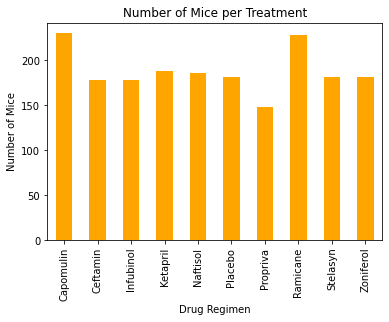

In [14]:
# Generate a bar plot 
bar_plot_pandas = number_of_mice_per_treatment.plot.bar(color='orange')
# Set the x label, y label and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.savefig("../Images/pandas_mice_per_treat.png", bbox_inches = "tight")
plt.show()

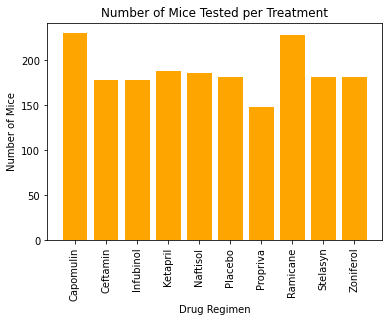

<function matplotlib.pyplot.show(close=None, block=None)>

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# index values
x_axis = number_of_mice_per_treatment.index.values
y_axis = number_of_mice_per_treatment.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='orange', align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.savefig("../Images/pyplpt_mice_per_treat.png", bbox_inches = "tight")
plt.show()
plt.show

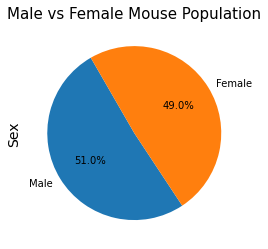

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_pandas = clean_drug_results_sort['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%',startangle=120)
plt.title('Male vs Female Mouse Population',fontsize = 15)
plt.ylabel('Sex',fontsize = 14)
plt.savefig("../Images/pandas_sex_distribution.png", bbox_inches = "tight")
plt.show()



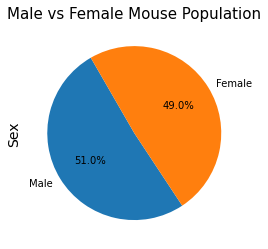

In [28]:
# Establish sex count of mice
distribution_of_sex = clean_drug_results_sort['Sex'].value_counts()
distribution_of_sex
labels = distribution_of_sex.index.values
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distribution_of_sex, labels=labels, autopct="%1.1f%%", startangle=120)
plt.title('Male vs Female Mouse Population',fontsize = 15)
plt.ylabel('Sex',fontsize = 14)
plt.savefig("../Images/pyplot_sex_distribution.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
final_tumor_volumes = drug_regimen_grouped.sum()['Tumor Volume (mm3)']
final_tumor_volumes
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_drug_results_sort.groupby(['Mouse ID'])['Timepoint'].max()
# creat DataFrame so merge works
max_timepoint_df = max_timepoint.reset_index()
max_timepoint_df.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_at_last_timepoint = max_timepoint_df.merge(clean_drug_results_sort, on=["Mouse ID","Timepoint"], how="left")
tumor_volume_at_last_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [30]:

# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_list
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in drug_list:
    tum_vol = tumor_volume_at_last_timepoint["Drug Regimen"] == drug
    volume_data = tumor_volume_at_last_timepoint.loc[tum_vol, "Tumor Volume (mm3)"]
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    tumor_vol_data.append(volume_data)
    #Find the upper and lower bounds
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = volume_data.loc[(volume_data < lower_bound) | (volume_data > upper_bound)]
    
    print(f"{drug} potential outliers: {outliers}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


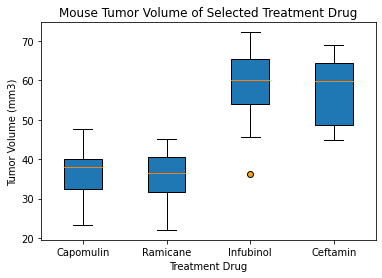

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers_colour = dict(markerfacecolor = "orange") #outliers colour of orange
plt.boxplot(tumor_vol_data, labels=drug_list, patch_artist="True", flierprops = outliers_colour)
plt.title("Mouse Tumor Volume of Selected Treatment Drug")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Drug")
plt.savefig("../Images/Tumor_Volume_Box_Plot_of_Selected_Drug.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

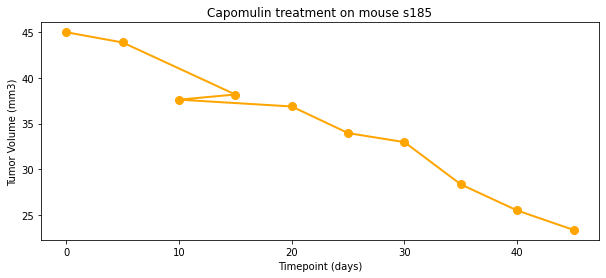

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_drug_results_sort.loc[clean_drug_results_sort["Drug Regimen"] == "Capomulin",:]
line = capomulin.loc[capomulin["Mouse ID"] == "s185",:]
# line.head(2)

line_x_axis = line["Timepoint"]
line_y_axis = line["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(10,4))
plt.title("Capomulin treatment on mouse s185")
plt.plot(line_x_axis, line_y_axis, linewidth=2, markersize=8, marker="o", color="orange")
plt.xlabel("Timepoint (days)",fontsize=10)
plt.ylabel("Tumor Volume (mm3)",fontsize=10)
plt.savefig("../Images/Capomulin_Line_plot_on_mouse_s185.png", bbox_inches = "tight")
plt.show()

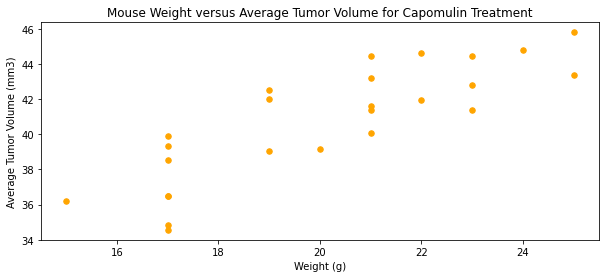

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10, 4))
average_capomulin_volume = capomulin.groupby(['Mouse ID']).mean()

marker_size=8
plt.scatter(average_capomulin_volume['Weight (g)'],average_capomulin_volume['Tumor Volume (mm3)'], s=30, color="orange")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight versus Average Tumor Volume for Capomulin Treatment")
plt.savefig("../Images/Capomulin_scatter_on_mouse_s185.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and linear regression model # for mouse weight and average tumor volume for 
# the Capomulin regimen
correlation=round(st.pearsonr(average_capomulin_volume['Weight (g)'],average_capomulin_volume['Tumor Volume (mm3)'])[0],2)

print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


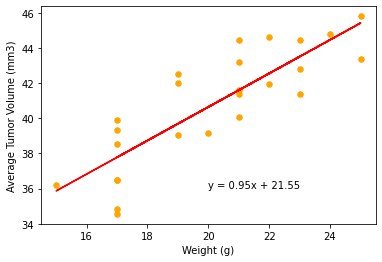

In [41]:
x_values = average_capomulin_volume["Weight (g)"]
y_values = average_capomulin_volume["Tumor Volume (mm3)"]

# Add the line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Plot the chart
plt.scatter(x_values, y_values, s=30, color="orange")

# Regression line
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Label axis
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.annotate(line_eq,(20, 36))
plt.savefig("../Images/Capomulin_linear_regression_on_mouse_s185.png", bbox_inches = "tight")
plt.show()

In [42]:
print(line_eq)

y = 0.95x + 21.55


In [56]:
print(f"Observations")
print(f"-------------")
print(f"1. With duplicates datasets removed, the total number of mice treated were 248.\n2. The count of mice by gender identified that 126(51%) were male and 122 (49%) were female.\n3. The treatment of the drug Capomulin & Ramicane indicated a reduction in tumor volume in comparison to the drugs Infubinol & Ceftamin, which were conderably high in tumor volumes at the end of the 45 day trial.\n4. The correlation between mouse weight and average tumor volume is 0.84, indicating that when the weight of the mouse increases, as does the tumor volume.")

Observations
-------------
1. With duplicates datasets removed, the totl number of mice treated were 248.
2. The count of mice by gender identified that 126(51%) were male and 122 (49%) were female.
3. The treatment of the drug Capomulin & Ramicane indicated a reduction in tumor volume in comparison to the drugs Infubinol & Ceftamin, which were conderably high in tumor volumes at the end of the 45 day trial.
4. The correlation between mouse weight and average tumor volume is 0.84, indicating that when the weight of the mouse increases, as does the tumor volume.
